# Introduction

The primary objective of this exercise was to practice and use functions of the panda series which was given to us by our Professor Michael Schermann. This exercise deals with a simple analysis of the stock market. 
I have focussed on Apple 'AAPL' primarily.

What did I get out of it you ask? Well firstly and foremost I learned a great deal about pandas library and how to use them. Secondly, I did not know much about stocks and the reason for surge in them before  this exercise. 
Also, these exercises helps me understand about python in general and how to document them professionally.

# How did I carry out the Stock Analysis?

Let me take you step by step as to what and how I performed this exercise including what I learned.

* First: We were asked to use pandas function pandas datareader to acquire the Apple's stock data from the year 1982 uptil today.
Reference provided to us: https://pandas-datareader.readthedocs.io/en/latest/

-- I tried to import pandas datareader but it caused me errors. Hence I referred to https://github.com/pydata/pandas-datareader and tried to install pandas-datareader in my system, but that also caused me errors. 
Since I have windows and am using anaconda navigator to launch jupyter I realised I have to install or add pandas datareader library into that. I used the anaconda's terminal by referring to https://python-forum.io/Thread-run-script-from-anaconda-command-prompt and installed pandas-datareader by the command given in https://anaconda.org/anaconda/pandas-datareader.

-- After this I was ready to start and explore the world of Pandas.


In [78]:
# print all the outputs in a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [79]:
import pandas_datareader as pdread

In [80]:
import pandas as pnd

In [81]:
import datetime as dt

Above are the imports i used to perform this exercise.

In [82]:
st = dt.datetime(1982, 1, 1)

In [83]:
ed = dt.datetime.today()

Initialized, 

st --> from when I wanted the stock price

ed --> until when I wanted the stock price

In [84]:
stocks = pdread.DataReader('AAPL', 'yahoo', st, ed)

-- I referred multiple sites/blogs to get the above command working

* https://pandas-datareader.readthedocs.io/en/latest/remote_data.html#yahoo-finance-quotes

* https://stackoverflow.com/questions/44012335/python-pandas-datareader-isnt-working

* https://github.com/pydata/pandas-datareader/issues/315

Turns out my command was right but I had made a very small mistake, I was searching for the ticker symbol APPL instead fo AAPL. And finally got this to work after multiple tries.

In [85]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1982-01-04,0.395089,0.395089,0.392857,0.392857,0.321458,17813600
1982-01-05,0.377232,0.377232,0.372768,0.372768,0.305020,8960000
1982-01-06,0.370536,0.370536,0.368304,0.368304,0.301367,16520000
1982-01-07,0.343750,0.343750,0.339286,0.339286,0.277623,17511200
1982-01-08,0.354911,0.357143,0.354911,0.354911,0.290408,14151200


In [86]:
stocks.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-16,177.899994,179.389999,176.139999,176.190002,176.190002,29565900
2018-01-17,176.149994,179.250000,175.070007,179.100006,179.100006,34386800
2018-01-18,179.369995,180.100006,178.250000,179.259995,179.259995,31193400
2018-01-19,178.610001,179.580002,177.410004,178.460007,178.460007,31269600
2018-01-22,177.300003,177.779999,176.601593,177.000000,177.000000,27100407


In [87]:
stocks.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9092.000000,9092.000000,9092.000000,9092.000000,9092.000000,9.092000e+03
mean,22.785562,23.001318,22.551656,22.782830,21.403676,9.126154e+07
std,39.725507,40.034123,39.397154,39.728641,38.279935,8.756673e+07
min,0.198661,0.198661,0.196429,0.196429,0.160729,3.472000e+05
25%,1.098214,1.125000,1.066830,1.092500,0.961585,3.645168e+07
50%,1.669643,1.705357,1.638571,1.669643,1.465154,6.291040e+07
75%,23.563214,23.901071,23.110000,23.545357,21.106843,1.130045e+08
max,179.369995,180.100006,178.250000,179.259995,179.259995,1.855410e+09


The above, head, tail and describe functions is just to give a brief description on the data that I acquired from Yahoo Finance on Apple.

In [88]:
closePrice = stocks['Close']

I created a tag called closePrice just for the Close series as I was going to primarily work on this.


We were asked to use the %magic command to activate inline matplotlib graphs and plot the close series. 

The below command does this.

Reference: https://stackoverflow.com/questions/43027980/purpose-of-matplotlib-inline/43028034


In [89]:
%matplotlib inline

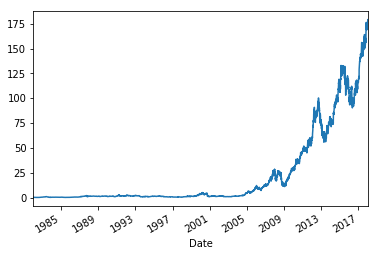

In [90]:
closePrice.plot()

# Overview of closeprice

Firstly, what is a close price or closing price? It refers to the last price stocks trade during a regular trading session. 

Reference: https://www.sec.gov/fast-answers/answerscloseprhtm.html

Looking from the plot of the closing price all the way from Jan 1st, 1982 until Jan 22nd, 2018, a broad overview would seem like the stock price was approximately around the same value till the year 2005 and then there was sudden increase exponentially till 2018. This could mean that Apple's performace increased exponentially and started gaining customer traction from 2005 onwards, basically since they moved into consumer electronics like iPad, iPhone and iPod.

Overall, Apple has done well for itself.

Since this is a broad-scale plot we cannot see the minute changes in the stock price which we can also call as surge in stock price. But we can notice the drops in stock-value around 2009 - 2017. Going forward we will dive into the surge in stock prices.

In [91]:
closePrice.max()

179.259995

In [187]:
closePrice.nlargest(1)

Date
2018-01-18    179.259995
Name: Close, dtype: float64

In [93]:
clPricesort = closePrice.sort_values(ascending=False)


In [94]:
clPricesort[1]

179.10000600000001

# Three approaches to find maximum close price

The above code shows the 3 ways to find the maximum close price in the given series.

* Max() -> The function by itself compares each value in the list and returns the largest value
* nlargest() -> The function by itself compares each value in the list and returns few of largest values by default. Unless a number is specified in the paranthesis. For example: as given above nlargest(1) reurns the maximum value in the series.
* The last is the most traditional way to find the largest, sort descending and the first value is the largest value.

Referenecs:
- https://stackoverflow.com/questions/15741759/find-maximum-value-of-a-column-and-return-the-corresponding-row-values-using-pan
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html
- https://docs.python.org/3/library/heapq.html#heapq.nlargest
- https://forum.freecodecamp.org/t/python-max-function/19205
- https://www.tutorialspoint.com/python/number_max.htm

# Highest stock price surge in 5 days 

Below code blocks is to find out five timeframes with the highest stock price surge in five days. Lets see what we get.


In [96]:
percent = (closePrice / closePrice.shift(1)) - 1

Here I have used the logic percent = ((a/b) - 1), a -> the stock price of the previous day, b-> the current stock price.
This logic would give me the percentage change in the stock price. 

To accomplish this, I used a pandas function called shift(), with this method we can shift a particular series or dataframe by a specified value. With the help of this I could get the percentage change and notice the surge in stock price.

Reference: 
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shift.html
- https://stackoverflow.com/questions/10982089/how-to-shift-a-column-in-pandas-dataframe

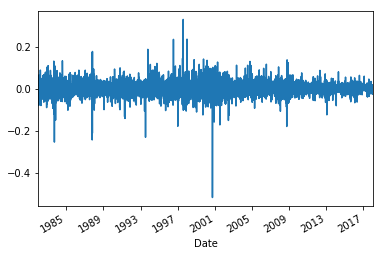

In [97]:
percent.plot()

By looking at the above plot of the percent change values, we can easily notice that unlike the previous plot (that showed a stagnant stock value until 2005), this shows the surge in stock price. This tells us that Apple stock was not stagnant but did waver.

In [101]:
persort = percent.abs().sort_values(ascending=False)

The data collected includes negetive values, hence to get the maximum 5 surges and their timeframe, I used the absolute value function and sorted the values in descending order.

Reference: https://www.tutorialspoint.com/python/number_abs.htm

In [102]:
persort.head()

Date
2000-09-29    0.518692
1997-08-06    0.332279
1983-09-23    0.253845
1987-10-19    0.243523
1998-01-02    0.238095
Name: Close, dtype: float64

# Stock surges

### September 29th, 2000
This date recorded the largest surge of about 51%. Apple's market value was simply sliced in half. They blamed lower than expected sales in the month of September, 2000. Computer maker's (making hardware, chips) stocks fell in general in this time.

Reference: http://money.cnn.com/2000/09/29/markets/techwrap/

### August 6th, 1997
The surge 33% here was due the fact that Microsoft Corp. bought $150 Million of non-voting shares of Apple for 3 years. Jobs joined the board along with Larry Ellison, CEO Oracle Corp.; Jerry York, a former chief financial officer at IBM and Chrysler Corp.; and Bill Campbell, CEO Intuit. This was to bring the troubled computer maker back into track.

Reference: http://money.cnn.com/1997/08/06/technology/apple/

### September 23th, 1983
The surge here was due to flattening sales, special write-offs and heavier investments to position the company for the future.

Reference: http://www.nytimes.com/1983/09/23/business/business-digest-friday-september-23-1983.html

### October 19th, 1987
This is the day the stock market collapsed. It was the day known as Black Monday.

Reference: http://money.cnn.com/2017/10/19/investing/romans-numeral-black-monday/index.html

### Jan 2nd, 1998
As per the maximum data we have here, this date is supposed to have the 5th largest surge. I was not able to find sufficient information for this day/date. Hence I am not able to comment on this particular date.


# Quarterly surge in stock 

This was particularly hard to do compared to the previous code blocks. I was not able to figure out the method or the logic. 
The most immediate logic I could think of was converting the daily stock price to monthly and moving forward from there.
I went through the below references for that
* https://stackoverflow.com/questions/38676323/is-it-possible-to-get-monthly-historical-stock-prices-in-python
* http://pandas.pydata.org/pandas-docs/stable/timeseries.html#periodindex-and-period-range
* https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html
* https://stackoverflow.com/questions/41271327/panda-dataframe-for-stock-change
* https://stackoverflow.com/questions/42191697/resample-daily-data-to-monthly-with-pandas-date-formatting?rq=1


But then I went through the pandas documentation and read about resampling. The blow code is from the below given references.

References:
* https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.resample.html#
* http://pandas.pydata.org/pandas-docs/version/0.12/timeseries.html


In [173]:
quarter = stocks.resample('Q-SEP')
quarter = quarter.mean()

This above command resamples the existing data quarterly until the ending of September. I am also taking the mean values of all the days in the quarter. 

In [174]:
qtrclosePrice = quarter['Close']

In [192]:
qtrclosePrice.head()

Date
1982-03-31    0.327765
1982-06-30    0.263747
1982-09-30    0.270752
1982-12-31    0.503418
1983-03-31    0.724383
Freq: Q-SEP, Name: Close, dtype: float64

In [197]:
percent_quarter = (qtrclosePrice / qtrclosePrice.shift(4)) - 1

This is the same logic I applied before, except this is for quarter and earlier it was for days. 
I am shifting by 4 because I want to compare the mean close price of quarter 1 with that of quarter 1 of next year.

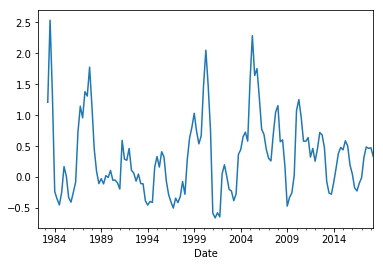

In [177]:
percent_quarter.plot()

This plot is to see how was the surge quarterly, similar to how I executed earlier to see the surge on a daily basis. Looking at this graph we can see the surges very clearly on a quarterly basis. The highest surge was sometime before 1984 and second highest a little after 2004.

In [188]:
mask = percent_quarter.abs().apply(lambda x: x > 1)
#percent_quarter = percent_quarter.apply(lambda x: x > 1)
percent_quarter[mask].nlargest(4)

Date
1983-06-30    2.535599
2005-03-31    2.286090
2000-03-31    2.051193
1987-09-30    1.777266
Name: Close, dtype: float64

This above code I have used the concept of mask and lambda function. 

The lambda function I have used to understand the overall surge in stock price greater than 100%. The it will return a value of True to every surge value greater than 100% and False to everything else.
I simply used that as mask and with nlargest(4) I could get the 4 largest surges in a quarter. 

### Largest Surge

As you can see the largest surge happened in the 3rd quarter of the fiscal year in 1983.
From 1980 - 1983 the apple stock increased from $ 2.75 -  8. Post this there was a decline in stocks around 1985 as Jobs left the company.

Reference:
* https://blogs.wsj.com/marketbeat/2011/08/25/apples-stock-price-through-the-ages/
* http://fortune.com/2012/10/05/apple-from-1980-to-2012/
* http://www.dividend.com/dividend-education/the-complete-history-of-apple-aapl/

# Visualization

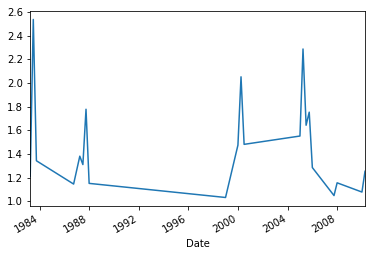

In [195]:
percent_quarter[mask].plot()

This is a plot of just those stock price where the surge is more than 100%. From this you can see that around 1983 there was a surge and also as mentioned earlier, as Jobs left the company in 1985 there was a decline in the stock level of the company.


# Conclusion

Apple's Stock price has exponentially increased since 2005, but they have always been growing. Many great and positive managerial decisions have been made for the betterment and future of the company which has resulted in the overall rise in stock price even though there have been surges to the negetive side.

Being new to Python and trying this exercise gave me a great deal of insights and understanding about stocks, pandas and Python. 
The reformatting of data (with code) could have caused some errors, it could also have been caused by the mathematical formula I used. But though this might be the case, I still learned a lot from this exercise. 

